In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model, metrics
import scipy

In [62]:
data=pd.read_excel("C:/Users/shafi/Downloads/case study4.xlsx")

In [63]:
data.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [64]:
data.tail()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
17,Month-18,Region - C,Manager - B,167996,191517
18,Month-19,Region - B,Manager - A,132135,227040
19,Month-20,Region - A,Manager - B,152493,212579
20,Month-21,Region - B,Manager - A,147425,263388
21,Month-22,Region - A,Manager - C,130263,243020


In [65]:
data1=data.rename(columns={'Sales_before_digital_add(in $)':'Sales_before_digital_add'})


In [66]:
data1

,Month,Region,Manager,Sales_before_digital_add,Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402
5,Month-6,Region - A,Manager - B,137163,256948
6,Month-7,Region - C,Manager - C,130625,222106
7,Month-8,Region - A,Manager - A,131140,230637
8,Month-9,Region - B,Manager - C,171259,226261
9,Month-10,Region - C,Manager - B,141956,193735


In [67]:
data2=data1.rename(columns={'Sales_After_digital_add(in $)':'Sales_After_digital_add'})

# ● The company wishes to clarify whether there is any increase in sales after stepping into digital marketing.

In [68]:

Null hypothesis(H0):sales increases after stepping into digital marketing
Alternate hypothesis(H1):sales does no increases after stepping into digital marketing

SyntaxError: invalid syntax (<ipython-input-68-5e3dcb7e7118>, line 1)

In [69]:
before_add=data2.drop(['Month','Region','Manager','Sales_After_digital_add'],axis=1)
before_add

,Sales_before_digital_add
0,132921
1,149559
2,146278
3,152167
4,159525
5,137163
6,130625
7,131140
8,171259
9,141956


In [70]:
after_add=data2.drop(['Month','Region','Manager','Sales_before_digital_add'],axis=1)
after_add

,Sales_After_digital_add
0,270390
1,223334
2,244243
3,231808
4,258402
5,256948
6,222106
7,230637
8,226261
9,193735


In [71]:
tvalue, pvalue = scipy.stats.ttest_ind(before_add,after_add)
print('tvalue=',tvalue)
print('pvalue=',pvalue)

tvalue= [-12.99508445]
pvalue= [2.61436801e-16]


In [72]:
tcritical=scipy.stats.t.ppf(q=1-.05,df=42)
tcritical

1.6819523559426

In [73]:
if np.abs(tvalue)>np.abs(tcritical) and pvalue <0.05:
    print('Reject Null hypothesis(H0):sales increases after stepping into digital marketing')
else:
    print('Reject Alternate hypothesis(H1):sales does no increases after stepping into digital marketing ')

Reject Null hypothesis(H0):sales increases after stepping into digital marketing


So there is no increase in sales after stepping into digital marketing

# ● The company needs to check whether there is any dependency between the features “Region” and “Manager”.

Null hypothesis(H0):no dependancy between “Region” and “Manager”  
Alternate hypothesis(H1):A dependancy between “Region” and “Manager”

In [76]:
relation=data2.drop(['Month','Sales_before_digital_add','Sales_After_digital_add'],axis=1)
relation

,Region,Manager
0,Region - A,Manager - A
1,Region - A,Manager - C
2,Region - B,Manager - A
3,Region - B,Manager - B
4,Region - C,Manager - B
5,Region - A,Manager - B
6,Region - C,Manager - C
7,Region - A,Manager - A
8,Region - B,Manager - C
9,Region - C,Manager - B


In [77]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(relation['Region'], relation['Manager'])
contigency

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,4,3,3
Region - B,4,1,2
Region - C,1,3,1


In [78]:
contigency_pct = pd.crosstab(relation['Region'], relation['Manager'], normalize='index')
contigency_pct

Manager,Manager - A,Manager - B,Manager - C
Region,,,
Region - A,0.400000,0.300000,0.300000
Region - B,0.571429,0.142857,0.285714
Region - C,0.200000,0.600000,0.200000


<AxesSubplot:xlabel='Manager', ylabel='Region'>

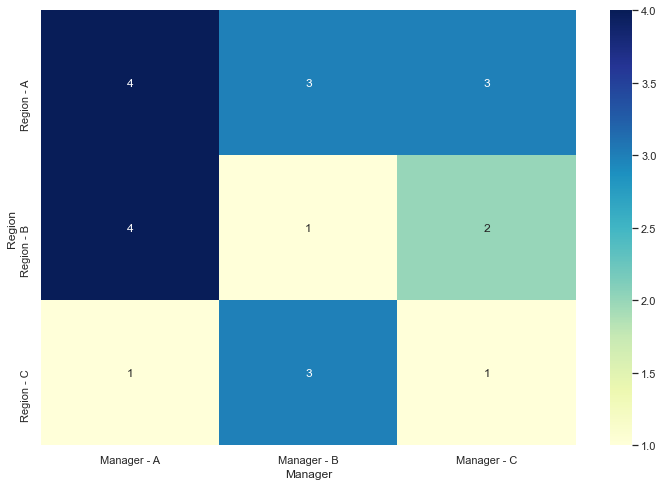

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

In [80]:
# Chi-square test of independence.
c, p, dof, expected = chi2_contingency(contigency)
p

0.5493991051158094

So we cant reject the null hypothesis.There is no dependancy between “Region” and “Manager”